### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [14]:
stores  = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda_1", "Tienda_2", "Tienda_3", "Tienda_4"]

ingresos = []

for df in stores:
  precios = list(df["Precio"])

  total = 0
  for precio in precios:
    total += precio

  ingresos.append(total)

for nombre, total in zip(nombres, ingresos):
    print(f"{nombre:<8} → {total:,.2f}")

Tienda_1 → 1,150,880,400.00
Tienda_2 → 1,116,343,500.00
Tienda_3 → 1,098,019,600.00
Tienda_4 → 1,038,375,700.00


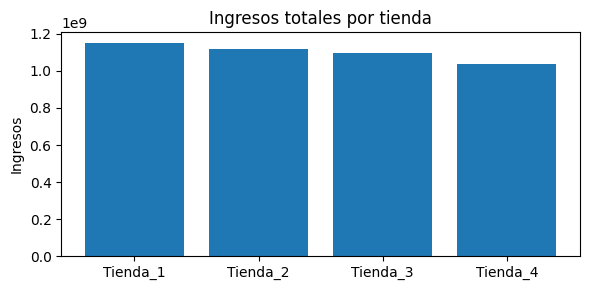

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(nombres, ingresos)
plt.ylabel("Ingresos")
plt.title("Ingresos totales por tienda")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [16]:
for nombre, df in zip(nombres, stores):

    categorias = list(df["Categoría del Producto"])
    conteo = {}                           # clave = categoría, valor = unidades vendidas
    for cat in categorias:
        conteo[cat] = conteo.get(cat, 0) + 1

    # ---categoría más popular -------------------------------
    categoria_top = max(conteo, key=conteo.get)
    unidades_top  = conteo[categoria_top]

    print(f"\n{nombre}")
    print("-" * len(nombre))
    for cat, qty in conteo.items():
        print(f"{cat:<25} : {qty} ventas")
    print(f">>> Más popular: {categoria_top} ({unidades_top} ventas)")



Tienda_1
--------
Electrónicos              : 448 ventas
Muebles                   : 465 ventas
Juguetes                  : 324 ventas
Electrodomésticos         : 312 ventas
Artículos para el hogar   : 171 ventas
Deportes y diversión      : 284 ventas
Libros                    : 173 ventas
Instrumentos musicales    : 182 ventas
>>> Más popular: Muebles (465 ventas)

Tienda_2
--------
Muebles                   : 442 ventas
Instrumentos musicales    : 224 ventas
Deportes y diversión      : 275 ventas
Electrónicos              : 422 ventas
Artículos para el hogar   : 181 ventas
Juguetes                  : 313 ventas
Electrodomésticos         : 305 ventas
Libros                    : 197 ventas
>>> Más popular: Muebles (442 ventas)

Tienda_3
--------
Electrodomésticos         : 278 ventas
Muebles                   : 499 ventas
Instrumentos musicales    : 177 ventas
Deportes y diversión      : 277 ventas
Electrónicos              : 451 ventas
Juguetes                  : 315 ventas
Artículos

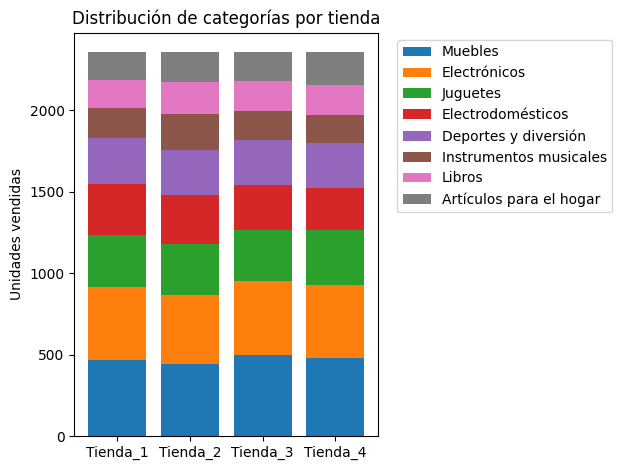

In [35]:
import matplotlib.pyplot as plt
from collections import Counter

# construir {categoría: [t1,t2,t3,t4]}
tot_cat = {}
for i, df in enumerate(stores):
    for cat in df["Categoría del Producto"]:
        if cat not in tot_cat:
            tot_cat[cat] = [0,0,0,0]
        tot_cat[cat][i] += 1

# ordenar categorías por total global
ordenadas = sorted(tot_cat.items(), key=lambda x: sum(x[1]), reverse=True)

bottom = [0,0,0,0]
for cat, vals in ordenadas:
    plt.bar(nombres, vals, bottom=bottom, label=cat)
    bottom = [b+v for b,v in zip(bottom, vals)]

plt.ylabel("Unidades vendidas")
plt.title("Distribución de categorías por tienda")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [37]:
promedios = []

for df in stores:
    calificaciones = list(df["Calificación"])          # [4, 1, 5, …]

    # 3. Calcular la media →  sum()  /  len()
    total = 0
    for nota in calificaciones:
        total += nota

    promedio = total / len(calificaciones)             # media aritmética
    promedios.append(promedio)

for nombre, avg in zip(nombres, promedios):
    print(f"{nombre:<9} → {avg:.2f} ★")

Tienda_1  → 3.98 ★
Tienda_2  → 4.04 ★
Tienda_3  → 4.05 ★
Tienda_4  → 4.00 ★


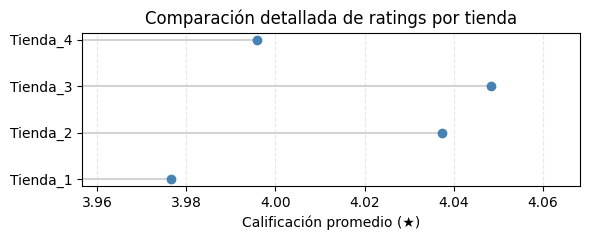

In [41]:
plt.figure(figsize=(6, 2.5))

for y, (tienda, rating) in enumerate(zip(nombres, promedios)):
    plt.hlines(y, xmin=min(promedios) - 0.02, xmax=rating, color="lightgray")

plt.plot(promedios, nombres, "o", color="steelblue")

plt.xlim(min(promedios) - 0.02, max(promedios) + 0.02)
plt.xlabel("Calificación promedio (★)")
plt.title("Comparación detallada de ratings por tienda")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [21]:
for nombre, df in zip(nombres, stores):

    productos = list(df["Producto"])

    conteo = {}
    for p in productos:
        conteo[p] = conteo.get(p, 0) + 1

    # Producto más y menos vendido
    mas_vendido   = max(conteo, key=conteo.get)
    menos_vendido = min(conteo, key=conteo.get)

    print(f"\n{nombre}")
    print("-" * len(nombre))
    print(f"• Más vendido   : {mas_vendido}  ({conteo[mas_vendido]} unidades)")
    print(f"• Menos vendido : {menos_vendido}  ({conteo[menos_vendido]} unidad{'es' if conteo[menos_vendido]!=1 else ''})")



Tienda_1
--------
• Más vendido   : Microondas  (60 unidades)
• Menos vendido : Auriculares con micrófono  (33 unidades)

Tienda_2
--------
• Más vendido   : Iniciando en programación  (65 unidades)
• Menos vendido : Juego de mesa  (32 unidades)

Tienda_3
--------
• Más vendido   : Kit de bancas  (57 unidades)
• Menos vendido : Bloques de construcción  (35 unidades)

Tienda_4
--------
• Más vendido   : Cama box  (62 unidades)
• Menos vendido : Guitarra eléctrica  (33 unidades)


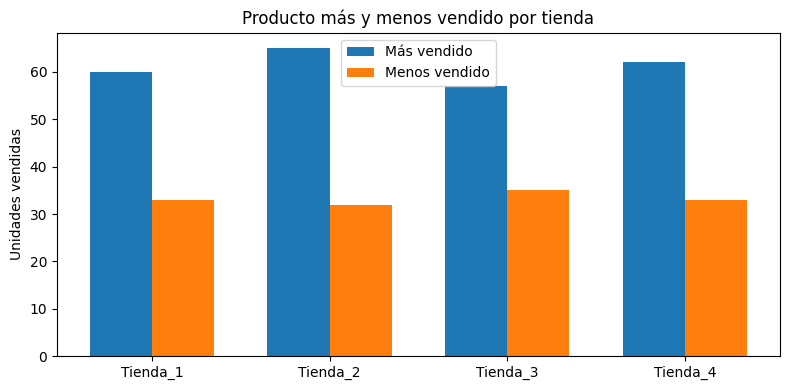

In [49]:
x = np.arange(len(nombres))
ancho = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - ancho/2, mas_val, width=ancho, label="Más vendido")
plt.bar(x + ancho/2, men_val, width=ancho, label="Menos vendido")

plt.xticks(x, nombres)
plt.ylabel("Unidades vendidas")
plt.title("Producto más y menos vendido por tienda")
plt.legend()

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [22]:
promedios_envio = []

for df in stores:

    envios = list(df["Costo de envío"])

    # promedio
    suma   = 0
    for costo in envios:
        suma += costo                                    # acumulador
    promedio = suma / len(envios)                        # media aritmética

    promedios_envio.append(promedio)


for nombre, avg in zip(nombres, promedios_envio):
    print(f"{nombre:<9} → {avg:,.2f} de costo de envío promedio")

Tienda_1  → 26,018.61 de costo de envío promedio
Tienda_2  → 25,216.24 de costo de envío promedio
Tienda_3  → 24,805.68 de costo de envío promedio
Tienda_4  → 23,459.46 de costo de envío promedio


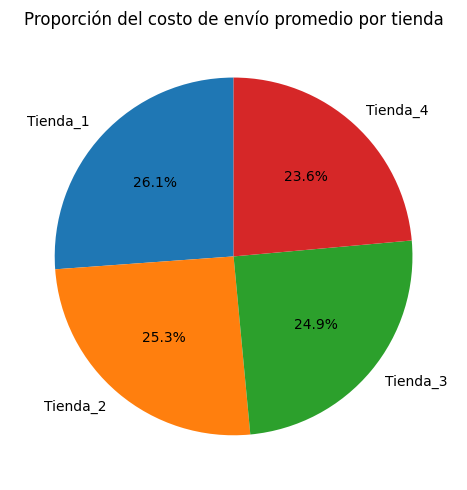

In [51]:
plt.figure(figsize=(5,5))
plt.pie(
    promedios_envio,
    labels=nombres,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proporción del costo de envío promedio por tienda")
plt.tight_layout()
plt.show()